In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image
import scipy as sp
from scipy.spatial.distance import cdist
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [2]:
ls

2cf92c40c3f3306321d789f7e9c12893.jpg  output_11_20.png
AML - Homework 8 #1.ipynb             output_11_21.png
AML - Homework 8 #2.ipynb             output_11_22.png
AML - Homework 8 #3.ipynb             output_11_23.png
AML - Homework 8 #4.html              output_11_3.png
AML - Homework 8 #4.ipynb             output_11_4.png
RobertMixed03.jpg                     output_11_5.png
notebook.tex                          output_11_6.png
output_11_0.png                       output_11_7.png
output_11_1.png                       output_11_8.png
output_11_10.png                      output_11_9.png
output_11_11.png                      output_12_0.png
output_11_12.png                      output_12_1.png
output_11_13.png                      output_12_2.png
output_11_14.png                      output_12_3.png
output_11_15.png                      output_12_4.png
output_11_16.png                      output_7_0.png
output_11_17.png                      output_9_0.png
output_11_18.png          

In [3]:
def getReshapedImage(path):
    img = Image.open(path)
    img = np.array(img)
    xdim = img.shape[0]
    ydim = img.shape[1]
    
    imgR = img[:,:,0].flatten()
    imgG = img[:,:,1].flatten()
    imgB = img[:,:,2].flatten()

    reshapedImg = np.array([imgR,imgG,imgB])
    reshapedImg = np.transpose(reshapedImg)
    
    plt.imshow(img)
    plt.title("Original Image")
    plt.show()
    return reshapedImg, xdim, ydim

In [4]:
def getStarter(numSegments,reshapedImg):
    means = KMeans(n_clusters=segment)
    means.fit(reshapedImg)
    labels = means.predict(reshapedImg)
    startMu = means.cluster_centers_
    totalpixels = labels.shape[0]
    startWeights = np.unique(labels,return_counts=True)[1]/totalpixels
    return startMu,startWeights

In [5]:
def getRandomStarter(numSegments,xdim,ydim,reshaped):
    totalpixels = xdim*ydim
    startMu = reshaped[np.random.randint(0,totalpixels,size=segment)]
# startMu = np.random.rand(segment,3)*255
#     print(startMu)
    startWeights = np.random.rand(segment)
    startWeights = startWeights/np.sum(startWeights)
    startWeights[-1] = 1-(np.sum(startWeights[0:-1]))
#     print(startWeights)
    return startMu,startWeights

In [6]:
def EM(reshapedImg,Mu,pi,segment,x,y):
    totalpixels = x*y
    wij = np.zeros((totalpixels,segment))
    for count in range(20):
        for i in np.arange(segment):
            d = cdist(reshapedImg,Mu,metric='euclidean')
            d = np.amin(d,axis=1)
            p = np.sum((reshapedImg-Mu[i])**2,axis=1)-d**2
            wij[:,i] = np.exp(-0.5*(p))*pi[i]
        denom = np.sum(wij,axis=1)
        den = np.repeat(denom,segment).reshape(-1,segment)
        wij = wij/den
        for j in np.arange(segment):
            jth = np.repeat(wij[:,j],3).reshape(-1,3)
            jden = np.sum(jth,axis=0)
            Mu[j] = np.sum(reshapedImg*jth,axis=0)/jden
        pi = np.sum(wij,axis=0)/totalpixels
    return Mu,pi

In [7]:
def showSegmentation(reshapedImg,Mu,x,y):
    dists = cdist(reshapedImg,Mu)
    argmincenters = np.argmin(dists,axis=1)
    segmented= Mu[argmincenters]
    undoreshape = segmented.reshape(x,y,3)
    undoreshape = undoreshape/255
    plt.imshow(undoreshape)
    plt.show()

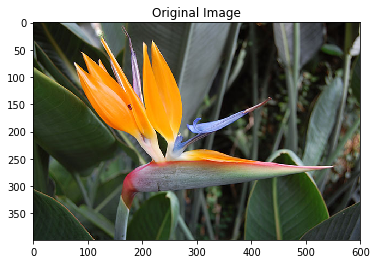

In [115]:
segment = 10
reshaped,x,y = getReshapedImage("smallstrelitzia.jpg")
mu,pi = getStarter(segment,reshaped)

In [116]:
rmu,rpi = getRandomStarter(segment,x,y,reshaped)

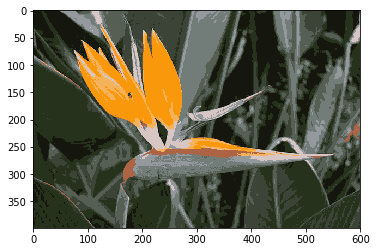

In [117]:
mu,pi = EM(reshaped,mu,pi,segment,x,y)
showSegmentation(reshaped,mu,x,y)

In [8]:
paths = ['smallstrelitzia.jpg','smallsunset.jpg','RobertMixed03.jpg','2cf92c40c3f3306321d789f7e9c12893.jpg']
segments = [10,20,50]

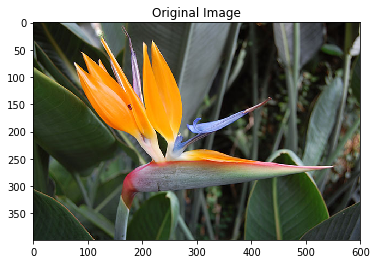

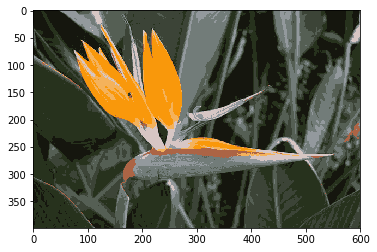

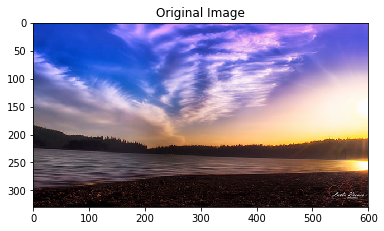

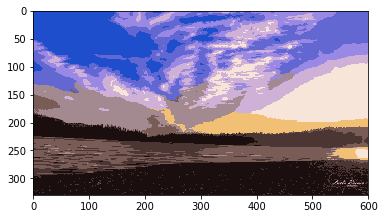

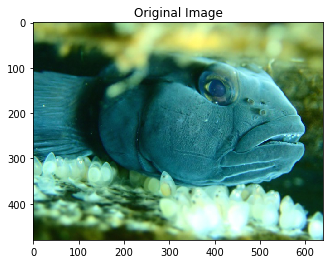

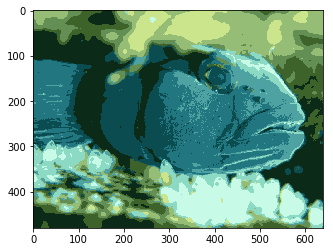

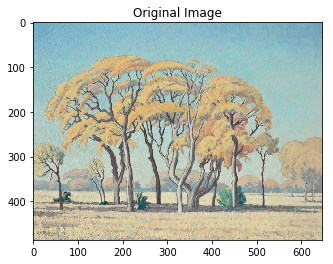

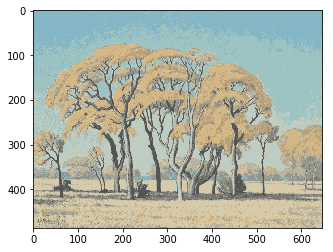

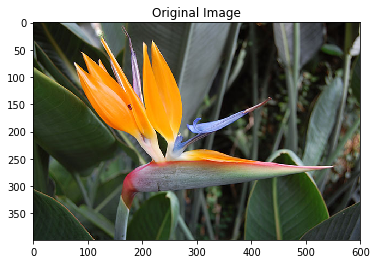

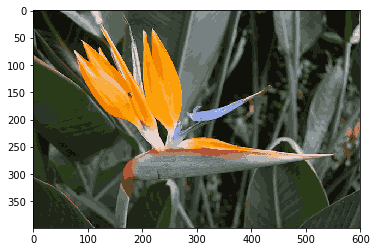

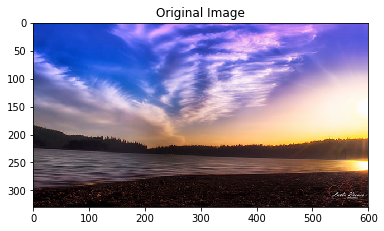

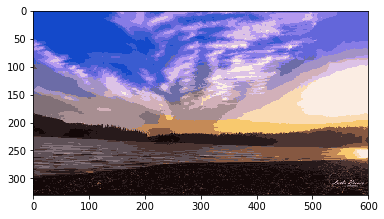

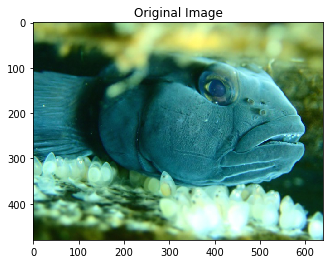

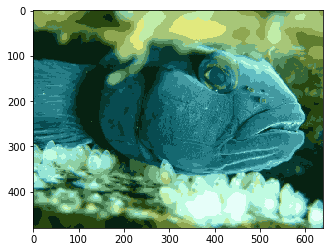

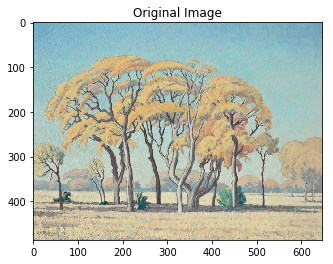

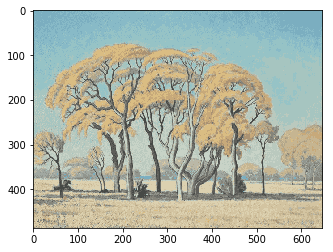

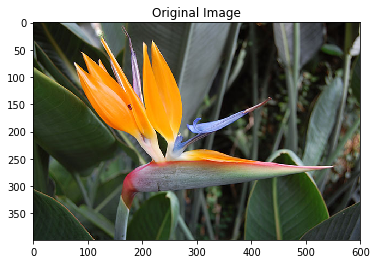

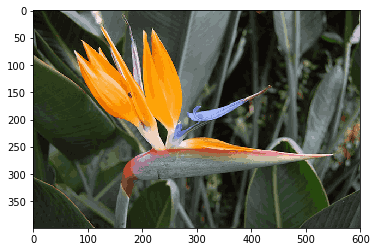

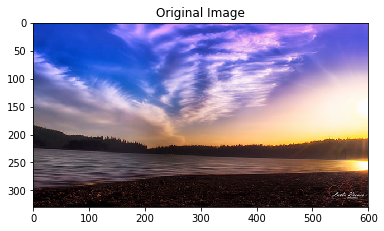

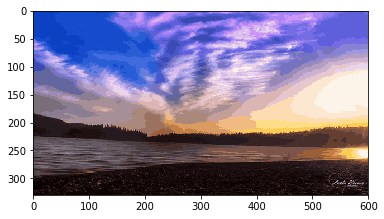

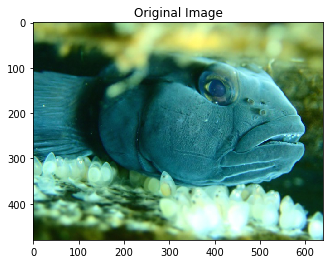

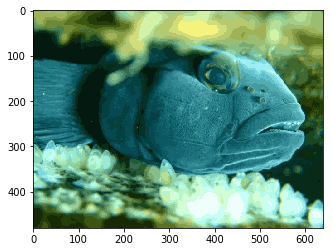

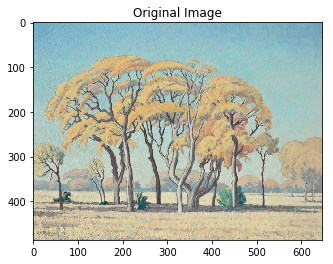

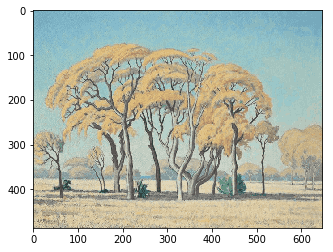

In [121]:
for segment in segments:
    for path in paths:
        reshaped,x,y = getReshapedImage(path)
        # rmu,rpi = getRandomStarter(segment,x,y,reshaped)
        # m,p = EM(reshaped,mu,rpi,segment,x,y)
        mu,pi = getStarter(numSegments=segment,reshapedImg=reshaped)
        m,p = EM(reshaped,mu,pi,segment,x,y)

        showSegmentation(reshaped,m,x,y)

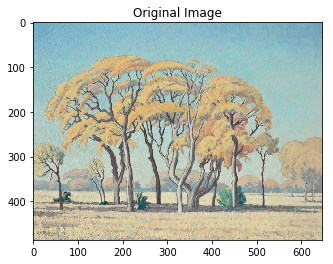

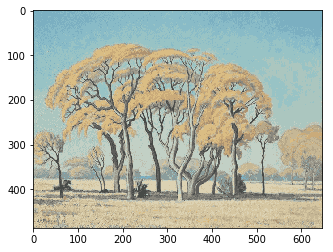

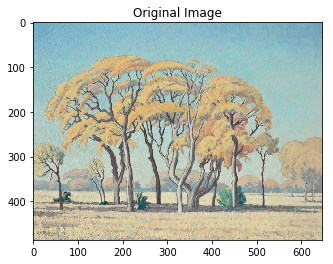

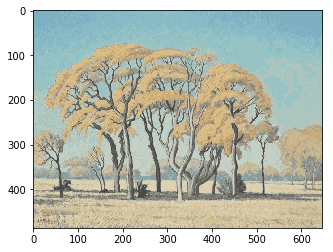

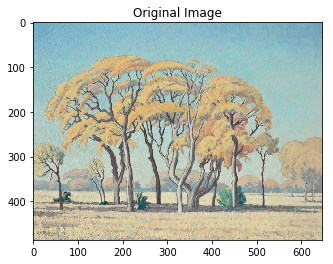

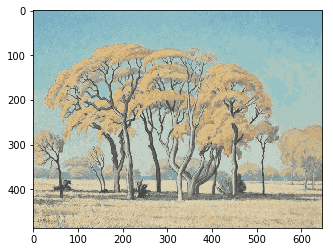

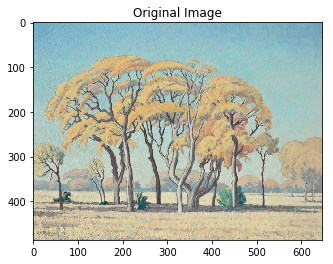

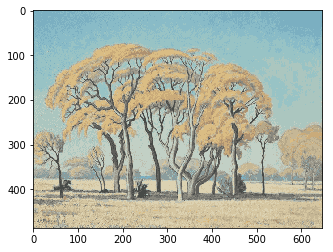

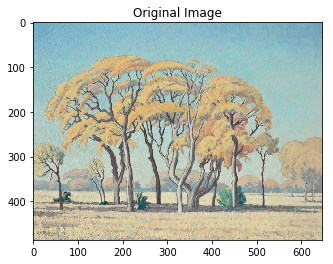

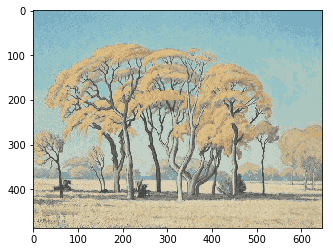

In [9]:
segment = 20
for n in np.arange(5):
    reshaped,x,y = getReshapedImage(paths[3])
    mu,pi = getStarter(numSegments=segment,reshapedImg=reshaped)
    m,p = EM(reshaped,mu,pi,segment,x,y)
    showSegmentation(reshaped,m,x,y)
